In [19]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
m_city_ride = pd.merge(city,ride, on = "city")

# Display the data table for preview
m_city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

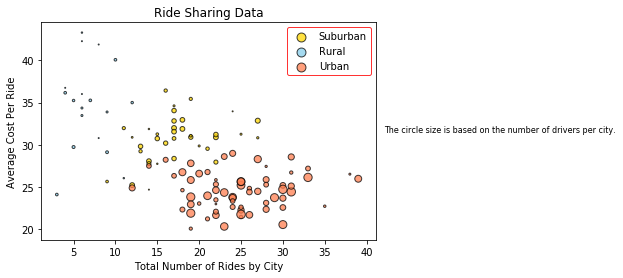

In [75]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
#Avg Fare Per City
gb_CitybyFare = m_city_ride.groupby(['city','type'], as_index=False)
funcs = {'fare':'mean'}
agg_CitybyFare = gb_CitybyFare.agg(funcs)
agg_CitybyFare

#total rides Per City
gb_CitybyRides = m_city_ride.groupby(['city','type'], as_index=False)
funcs = {'ride_id':'count'}
agg_CitybyRides = gb_CitybyRides.agg(funcs)
agg_CitybyRides

#total drivers Per City
gb_CitybyDrivers = city.groupby(['city','type'], as_index=False)
funcs = {'driver_count':'sum'}
agg_CitybyDrivers = gb_CitybyDrivers.agg(funcs)
agg_CitybyDrivers

#merge three data sets
m_aggs = pd.merge(pd.merge(agg_CitybyFare, agg_CitybyRides, on =['city','type']),agg_CitybyDrivers, on=['city','type'])
m_aggs

s= m_aggs.loc[m_aggs['type']=='Suburban']
r= m_aggs.loc[m_aggs['type']=='Rural']
u= m_aggs.loc[m_aggs['type']=='Urban']

# Incorporate the other graph properties
plt.title("Ride Sharing Data")
plt.xlabel("Total Number of Rides by City")
plt.ylabel("Average Cost Per Ride")

plt.scatter(s['ride_id'] ,s['fare'] , marker="o", facecolors="Gold", edgecolors="Black", label= "Suburban", s=s['driver_count'], alpha=0.75)
plt.scatter(r['ride_id'] ,r['fare'] , marker="o", facecolors="SkyBlue", edgecolors="Black", label= "Rural", s=r['driver_count'], alpha=0.75)
plt.scatter(u['ride_id'] ,u['fare'] , marker="o", facecolors="Coral", edgecolors="Black", label= "Urban", s=u['driver_count'], alpha=0.75)


# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'red')
lgnd.legendHandles[0]._sizes = [80]
lgnd.legendHandles[1]._sizes = [80]
lgnd.legendHandles[2]._sizes = [80]

# Incorporate a text label regarding circle size
plt.figtext(0.92, .5, "The circle size is based on the number of drivers per city.", fontsize=8)

# Save Figure
plt.savefig("Bubble_RideSharingData.png", bbox_inches="tight")

In [77]:
# Show plot
plt.show()

## Total Fares by City Type

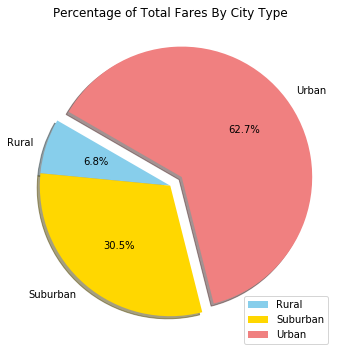

<Figure size 432x288 with 0 Axes>

In [88]:
# Calculate Type Percents
total_fares = ride['fare'].sum()
total_fares

gb_CityTypeFares = m_city_ride.groupby(['type'], as_index=False)
funcs = {'fare':'sum'}
agg_CityTypeFares = gb_CityTypeFares.agg(funcs)
agg_CityTypeFares['pct_of_total'] = (agg_CityTypeFares.fare/total_fares)*100
agg_CityTypeFares

# Build Pie Chart
colors = ["SkyBlue","Gold", "LightCoral"]
explode = (0, 0, 0.11)
labels = agg_CityTypeFares.type
plt.figure(figsize=(8,6))
plt.pie(agg_CityTypeFares.pct_of_total, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('Percentage of Total Fares By City Type')

plt.legend(loc= 'lower right').sizes = [60]
plt.show()

# Save Figure
plt.savefig("Pct_TotalFaresByCityType.png", bbox_inches = 'tight')



In [23]:
# Show Figure
plt.show()

## Total Rides by City Type

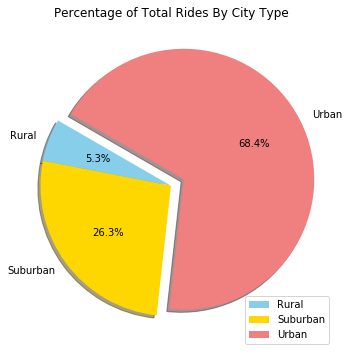

<Figure size 432x288 with 0 Axes>

In [89]:
total_rides = ride['ride_id'].count()
total_rides

gb_CityTypeRides = m_city_ride.groupby(['type'], as_index=False)
funcs = {'ride_id':'count'}
agg_CityTypeRides = gb_CityTypeRides.agg(funcs)
agg_CityTypeRides['pct_of_total'] = (agg_CityTypeRides.ride_id/total_rides)*100
agg_CityTypeRides

# Build Pie Chart
colors = ["SkyBlue","Gold", "LightCoral"]
explode = (0, 0, 0.11)
labels = agg_CityTypeRides.type
plt.figure(figsize=(8,6))
plt.pie(agg_CityTypeRides.pct_of_total, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('Percentage of Total Rides By City Type')

plt.legend(loc= 'lower right').sizes = [60]
plt.show()

# Save Figure
plt.savefig("Pct_TotalRidesByCityType.png", bbox_inches = 'tight')



In [25]:
# Show Figure
plt.show()

## Total Drivers by City Type

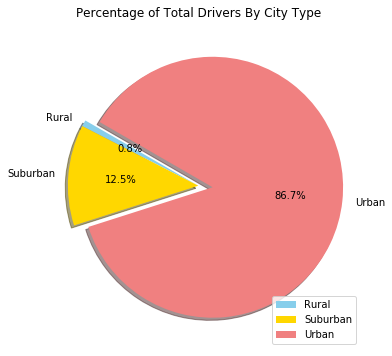

<Figure size 432x288 with 0 Axes>

In [93]:
total_drivers = city['driver_count'].sum()
total_drivers

gb_CityTypeDrivers = m_city_ride.groupby(['type'], as_index=False)
funcs = {'driver_count':'sum'}
agg_CityTypeDrivers = gb_CityTypeDrivers.agg(funcs)
agg_CityTypeDrivers['pct_of_total'] = (agg_CityTypeDrivers.driver_count/total_drivers)*100
agg_CityTypeDrivers

# Build Pie Chart
colors = ["SkyBlue","Gold", "LightCoral"]
explode = (0, 0, 0.11)
labels = agg_CityTypeDrivers.type
plt.figure(figsize=(8,6))
plt.pie(agg_CityTypeDrivers.pct_of_total, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('Percentage of Total Drivers By City Type')

plt.legend(loc= 'lower right').sizes = [60]
plt.show()

# Save Figure
plt.savefig("Pct_TotalDriversByCityType.png", bbox_inches = 'tight')

In [27]:
# Show Figure
plt.show()